In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'spam.csv',encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation

## Data Clearning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop unwanted columns

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
# Drop Duplicate records

df = df.drop_duplicates(keep='first')

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.duplicated().sum()

0

In [13]:
# Rename columns

df = df.rename(columns={'v1' : 'Target', 'v2' : 'Text'})

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Target'] = label.fit_transform(df['Target'])

## EDA

In [15]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


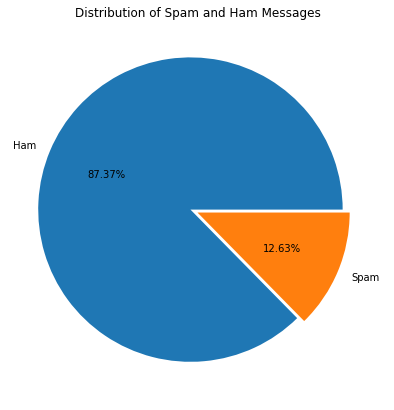

In [16]:
target_counts = df['Target'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(target_counts, autopct='%1.2f%%', explode=(0.05,0), labels=['Ham', 'Spam'])
plt.title('Distribution of Spam and Ham Messages')
plt.show()

#### Numbers of Characters in text

In [17]:
df['Num_characters'] = df['Text'].apply(len)

In [18]:
df

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [19]:
import nltk

####  Numbers of Words in text

In [20]:
df['Num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

#### Numbers of Sentence in text

In [21]:
df['Num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


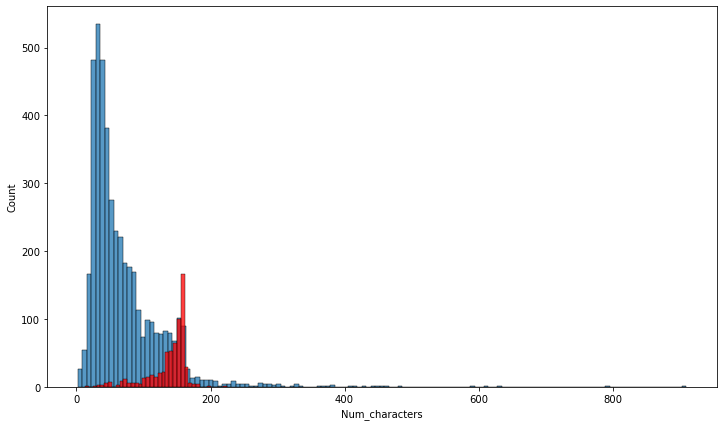

In [23]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['Target']==0]['Num_characters'])
sns.histplot(df[df['Target']==1]['Num_characters'],color='red')
plt.show()

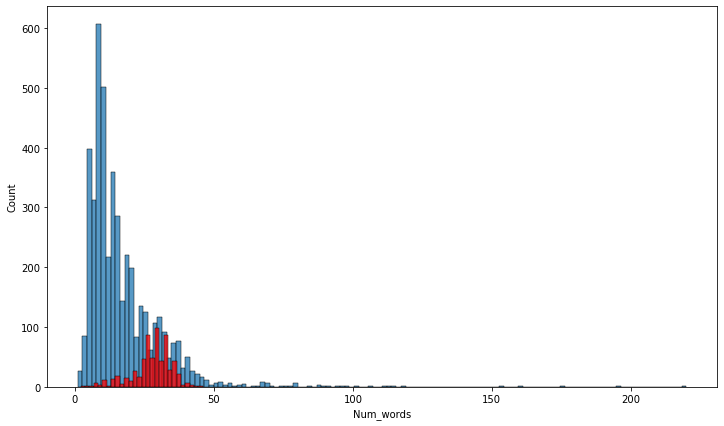

In [24]:
plt.figure(figsize=(12,7))

sns.histplot(df[df['Target']==0]['Num_words'])
sns.histplot(df[df['Target']==1]['Num_words'], color='red')
plt.show()

In [25]:
#sns.pairplot(df, hue='Target')

## Data Preprocessing

#### 

- Lower Case

- Remove HTML Tags

- Remove URL's

- Remove Punctuation

- Remove Stop Words

- Tokenization

- Lemmatize

- Remove Numbers and Number With words

In [26]:
import re
import nltk
import string, time
string.punctuation

from nltk.corpus import stopwords
stopwords.words('english')

from nltk.tokenize import word_tokenize, wordpunct_tokenize

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

### Create Function for cleaning Data

In [27]:

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # Adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # Verb
    elif treebank_tag.startswith('N'):
        return 'n'  # Noun
    elif treebank_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun

def text_clean(text):
    # Text Lower
    text = text.lower()

    # Remove HTML tags
    pattern = re.compile('<.*?>')
    text = pattern.sub('', text)

    # Remove URLs
    pattern = re.compile(r'https?://\S+|www\.\S+')
    text = pattern.sub('', text)

    # Remove Punctuation
    exclude = string.punctuation
    text = text.translate(str.maketrans('', '', exclude))

    # Tokenize the text and remove stop words while lemmatizing with POS tagging
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = wordpunct_tokenize(text)  # Tokenize the text
    tagged_words = pos_tag(words)  # Perform POS tagging
    cleaned_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_words if word not in stop_words]

    # Remove numbers and numbers with words
    text = re.sub(r'\b\d+\b|\b\d+\w+\b', '', ' '.join(cleaned_words))  # Join the cleaned words back into text

    return text


In [28]:
# Use this function to clear this text

input_text = "Check Out my Notebook's ! https://www.notebooks/Desktop/DataScience/NLP/Untitled.ipynb <body>hello friends<body> <h1> party time<h1> i am loving this party, why are you crying, he is running "

cleaned_text = text_clean(input_text)
print(cleaned_text)

check notebook hello friend party time love party cry run


In [29]:
test = df['Text'][10]
test

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [30]:
text_clean(test)

'im gonna home soon dont want talk stuff anymore tonight k ive cry enough today'

In [31]:
df['Transformed_text'] = df['Text'].apply(text_clean)

In [32]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf live around though


In [33]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [34]:
len(spam_corpus)

9211

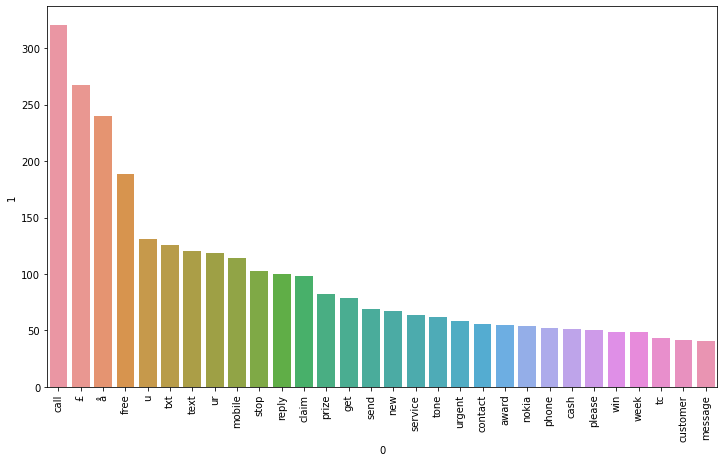

In [35]:
from collections import Counter

plt.figure(figsize=(12,7))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [37]:
len(ham_corpus)

36110

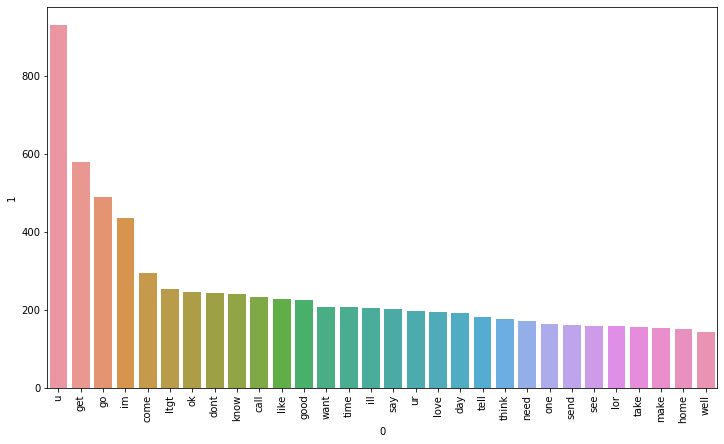

In [38]:
from collections import Counter

plt.figure(figsize=(12,7))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
# Text Vectorization
# using Bag of Words
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf live around though


##  Model Building

In [40]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [41]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [42]:
y = df['Target'].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [46]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [47]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[789 107]
 [ 24 114]]
0.5158371040723982


In [48]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]
1.0


In [49]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[894   2]
 [ 20 118]]
0.9833333333333333


In [50]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [52]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [53]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9586776859504132)

In [55]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("\n For: ",name)
    print("Accuracy :- ",current_accuracy)
    print("Precision :- ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


 For:  SVC
Accuracy :-  0.9738878143133463
Precision :-  0.9586776859504132

 For:  KN
Accuracy :-  0.9061895551257253
Precision :-  1.0

 For:  NB
Accuracy :-  0.9680851063829787
Precision :-  1.0

 For:  DT
Accuracy :-  0.937137330754352
Precision :-  0.8686868686868687

 For:  LR
Accuracy :-  0.9516441005802708
Precision :-  0.9313725490196079

 For:  RF
Accuracy :-  0.9690522243713733
Precision :-  0.9818181818181818

 For:  AdaBoost
Accuracy :-  0.9622823984526112
Precision :-  0.9541284403669725

 For:  BgC
Accuracy :-  0.9555125725338491
Precision :-  0.8650793650793651

 For:  ETC
Accuracy :-  0.9700193423597679
Precision :-  0.9652173913043478

 For:  GBDT
Accuracy :-  0.9506769825918762
Precision :-  0.9393939393939394


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [57]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.968085,1.000000
5,RF,0.969052,0.981818
8,ETC,0.970019,0.965217
0,SVC,0.973888,0.958678
6,AdaBoost,0.962282,0.954128
9,GBDT,0.950677,0.939394
4,LR,0.951644,0.931373
3,DT,0.937137,0.868687
7,BgC,0.955513,0.865079


##  Extra Trees Classifier Model gives 97% accuracy 

In [58]:
# Predict unseen messages


new_message = input("Write your message : ")
message_vectorized = tfidf.transform([new_message])
new_message_array = message_vectorized.toarray()

predict_class = etc.predict(new_message_array)

if predict_class[0] == 1:
    print("\nThis Message is SPAM")
    
else:
    print("\nThis Message is HAM")

Write your message : You've been selected for a free vacation to a tropical paradise! Click here to claim.

This Message is SPAM


In [60]:
import pickle

In [61]:
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(etc,open("ExtraTreesClassifier.pkl", 'wb'))
